In [58]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

In [7]:
df = pd.read_csv(
    "https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv"
)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [9]:
pd.DataFrame({
    "missing": df.isna().sum(),
    "percentage of missing data": (df.isna().sum() / len(df) * 100).round(2).astype(str) + "%"
})

,missing,percentage of missing data
PassengerId,0,0.0%
Survived,0,0.0%
Pclass,0,0.0%
Name,0,0.0%
Sex,0,0.0%
Age,177,19.87%
SibSp,0,0.0%
Parch,0,0.0%
Ticket,0,0.0%
Fare,0,0.0%


In [10]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [11]:
df.describe(include="object")

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


In [12]:
df["Survived"].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

In [13]:
(df["Survived"].value_counts(normalize=True) * 100).round(2).astype(str) + "%"

Survived
0    61.62%
1    38.38%
Name: proportion, dtype: object

In [14]:
df.drop(columns=["PassengerId", "Ticket", "Cabin"], inplace=True)

In [15]:
df["Title"] = df["Name"].str.extract(r" ([A-Za-z]+)\.", expand=False)

df.drop(columns=["Name"], inplace=True)

In [17]:
df[df["Sex"] == "female"]["Title"].value_counts()

Title
Miss        182
Mrs         125
Mlle          2
Mme           1
Ms            1
Lady          1
Countess      1
Dr            1
Name: count, dtype: int64

In [18]:
df["Title"] = df["Title"].replace(["Mlle", "Mme", "Ms"], "Miss")

In [19]:
df["Title"] = df["Title"].replace("Countess", "Lady")

In [20]:
df[df["Sex"] == "female"]["Title"].value_counts()

Title
Miss    186
Mrs     125
Lady      2
Dr        1
Name: count, dtype: int64

In [21]:
df[df["Sex"] == "male"]["Title"].value_counts()

Title
Mr          517
Master       40
Rev           6
Dr            6
Major         2
Col           2
Don           1
Sir           1
Capt          1
Jonkheer      1
Name: count, dtype: int64

In [22]:
df["Title"] = df["Title"].replace(["Major", "Col", "Don", "Capt", "Jonkheer"], "Sir")

In [23]:
df[df["Sex"] == "male"]["Title"].value_counts()

Title
Mr        517
Master     40
Sir         8
Rev         6
Dr          6
Name: count, dtype: int64

In [24]:
df["Sex"] = df["Sex"].map({"female": 0, "male": 1})

In [25]:
df["Sex"]

0      1
1      0
2      0
3      0
4      1
      ..
886    1
887    0
888    0
889    1
890    1
Name: Sex, Length: 891, dtype: int64

In [27]:
X_train, X_test, y_train, y_test = train_test_split(
    df.drop(columns=["Survived"]),
    df["Survived"],
    test_size=0.2,
    random_state=1,
    stratify=df["Survived"],
)

In [28]:
X_train.isna().sum()

Pclass        0
Sex           0
Age         139
SibSp         0
Parch         0
Fare          0
Embarked      2
Title         0
dtype: int64

In [29]:
X_test.isna().sum()

Pclass       0
Sex          0
Age         38
SibSp        0
Parch        0
Fare         0
Embarked     0
Title        0
dtype: int64

In [30]:
X_train[X_train["Title"] == "Master"].sort_values("Age")

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
803,3,1,0.42,0,1,8.5167,C,Master
755,2,1,0.67,1,1,14.5000,S,Master
831,2,1,0.83,1,1,18.7500,S,Master
78,2,1,0.83,0,2,29.0000,S,Master
305,1,1,0.92,1,2,151.5500,S,Master
386,3,1,1.00,5,2,46.9000,S,Master
183,2,1,1.00,2,1,39.0000,S,Master
827,2,1,1.00,0,2,37.0042,C,Master
164,3,1,1.00,4,1,39.6875,S,Master
7,3,1,2.00,3,1,21.0750,S,Master


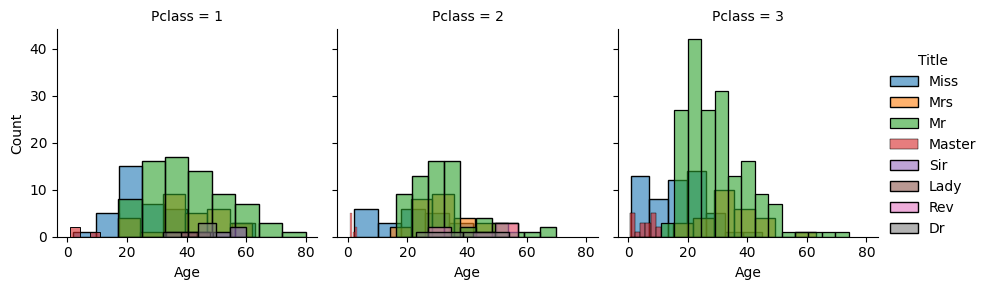

In [31]:
grid = sns.FacetGrid(X_train, col="Pclass", hue="Title")
grid.map(sns.histplot, "Age", alpha=0.6)
grid.add_legend()
plt.show()

In [33]:
median_ages = X_train.groupby(["Pclass", "Title"])["Age"].median()
overall_median_age = X_train["Age"].median()

In [34]:
def get_replacement_age(row, median_ages, overall_median_age):
    if pd.isnull(row["Age"]):
        try:
            return median_ages[row["Pclass"], row["Title"]]
        except KeyError:
            return overall_median_age

    return row["Age"]

In [35]:
X_train["Age"] = X_train.apply(
    get_replacement_age, args=(median_ages, overall_median_age), axis="columns"
)

In [36]:
X_test["Age"] = X_test.apply(
    get_replacement_age, args=(median_ages, overall_median_age), axis="columns"
)

In [37]:
X_train.isna().sum()

Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    2
Title       0
dtype: int64

In [38]:
X_test.isna().sum()

Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
Title       0
dtype: int64

In [39]:
X_train["Embarked"] = X_train["Embarked"].fillna(X_train["Embarked"].mode()[0])

In [40]:
X_train.isna().sum()

Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
Title       0
dtype: int64

In [41]:
X_train.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
368,3,0,18.0,0,0,7.750,Q,Miss
542,3,0,11.0,4,2,31.275,S,Miss
49,3,0,18.0,1,0,17.800,S,Mrs
667,3,1,28.0,0,0,7.775,S,Mr
297,1,0,2.0,1,2,151.550,S,Miss


In [42]:
encoder = OneHotEncoder(sparse_output=False, handle_unknown="ignore")
encoder.fit(X_train[["Embarked", "Title"]])

OneHotEncoder(handle_unknown='ignore', sparse_output=False)

In [47]:
X_train[list(encoder.get_feature_names_out())] = encoder.transform(
    X_train[["Embarked", "Title"]]
)
X_train.drop(columns=["Embarked", "Title"], inplace=True)

In [49]:
X_test[list(encoder.get_feature_names_out())] = encoder.transform(
    X_test[["Embarked", "Title"]]
)
X_test.drop(columns=["Embarked", "Title"], inplace=True)

In [53]:
rf = RandomForestClassifier(random_state=1, max_depth=6, n_estimators=50)
rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=6, n_estimators=50, random_state=1)

In [54]:
train_pred = rf.predict(X_train)
test_pred = rf.predict(X_test)

/home/saba/Desktop/university/ML/lecture_14/env/lib/python3.10/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


In [56]:
print("Accuracy: ", accuracy_score(y_train, train_pred))
print("F1 Score: ", f1_score(y_train, train_pred))
print("Precision: ", precision_score(y_train, train_pred))
print("Recall: ", recall_score(y_train, train_pred))

Accuracy:  0.875
F1 Score:  0.8237623762376237
Precision:  0.896551724137931
Recall:  0.7619047619047619


In [57]:
print("Accuracy: ", accuracy_score(y_test, test_pred))
print("F1 Score: ", f1_score(y_test, test_pred))
print("Precision: ", precision_score(y_test, test_pred))
print("Recall: ", recall_score(y_test, test_pred))

Accuracy:  0.8491620111731844
F1 Score:  0.7969924812030075
Precision:  0.828125
Recall:  0.7681159420289855


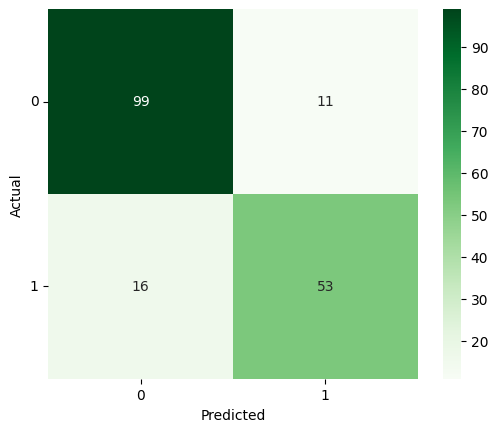

In [59]:
cm = confusion_matrix(y_test, test_pred)

ax = sns.heatmap(cm, annot=True, cmap="Greens", square=True)
ax.tick_params(axis='y', labelrotation=0)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()